In [65]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.stats import gaussian_kde
from matplotlib.ticker import MaxNLocator

In [66]:
def regular_bin(x, y, nbins=10, method="mean", error="sem"):
    """
    Bins data using regular (linearly spaced) bins.

    Args:
        x (array-like): Independent variable.
        y (array-like): Dependent variable to be binned.
        nbins (int): Number of linearly spaced bins.
        method (str): Aggregation method ('mean', 'median', 'sum').
        error (str): 'std' for standard deviation or 'sem' for standard error of the mean.

    Returns:
        bin_centers (numpy array): Centers of the bins.
        y_binned (numpy array): Aggregated y-values.
        y_err (numpy array): Error bars (std or sem).
    """
    bins = np.linspace(min(x), max(x), nbins + 1)
    bin_indices = np.digitize(x, bins) - 1
    bin_centers = (bins[:-1] + bins[1:]) / 2
    y_binned = np.full(nbins, np.nan)
    y_err = np.full(nbins, np.nan)

    for i in range(nbins):
        mask = bin_indices == i
        if np.any(mask):
            y_vals = y[mask]
            if method == "mean":
                y_binned[i] = np.mean(y_vals)
            elif method == "median":
                y_binned[i] = np.median(y_vals)
            elif method == "sum":
                y_binned[i] = np.sum(y_vals)
            if error == "std":
                y_err[i] = np.std(y_vals)
            elif error == "sem":
                y_err[i] = np.std(y_vals) / np.sqrt(len(y_vals))
    return bin_centers, y_binned, y_err


In [67]:
fit_single_path = 'Working_Data/650/20_esm2_650_unique_single_mutations_YAP1.csv'
fit_double_path = 'Working_Data/650/20_llm_yap1_esm2_650.csv'

In [68]:
sing_df = pd.read_csv(fit_single_path)
doub_df = pd.read_csv(fit_double_path)

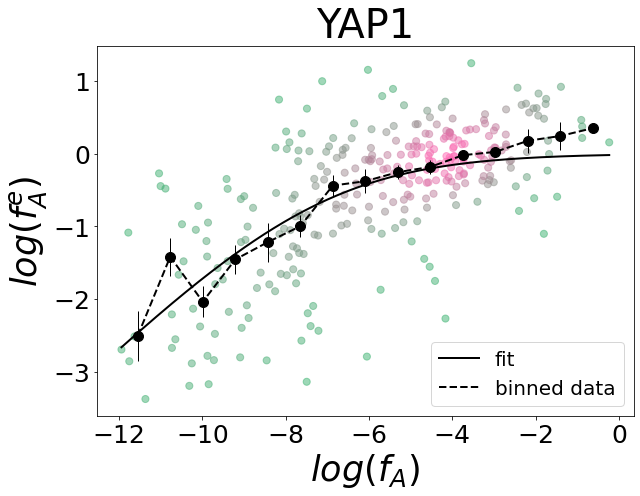

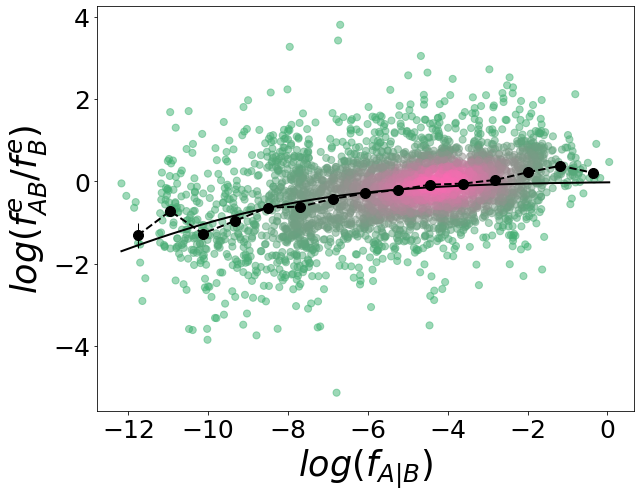

In [79]:
# Extract data
x = sing_df['llm_single_mut']
y = sing_df['expt_single_mut']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.5492
c_param = 7.2232
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'fit')
# Add binned line
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned data')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0, ms=10)

ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

# Labels and formatting
ax.set_title('YAP1', fontsize=40)
plt.xlabel("$log(f_A)$", fontsize=35)
plt.ylabel("$log(f^e_A)$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.legend(fontsize=20, loc='lower right')

plt.tight_layout()

#plt.savefig('ESM2_Figs/YAP1_wildtype_fit2.png', dpi=300)
plt.show()


log_exp_double_exp_mut2_ = doub_df.log_fitness - doub_df.Mut2_expt_fitness
log_exp_double_exp_mut1_ = doub_df.log_fitness - doub_df.Mut1_expt_fitness

# Concatenate corresponding LLM values
x = pd.concat([doub_df['mut21'], doub_df['mut12']], ignore_index=True)
y = pd.concat([log_exp_double_exp_mut1_, log_exp_double_exp_mut2_], ignore_index=True)

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.4354
c_param = 8.7439
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'$mutated background$')
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0, ms=10)


ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

# Labels and formatting
plt.xlabel(r'$log(f_{A|B})$', fontsize=35)
plt.ylabel(r'$log(f^e_{AB}/f^e_{B})$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#ax.legend(fontsize=15)

plt.tight_layout()

#plt.savefig('ESM2_Figs/YAP1_background_fit2.png', dpi=300)
plt.show()


In [58]:
fit_single_path = 'Working_Data/650/20_esm2_650_unique_single_mutations_TEM1.csv'
fit_double_path = 'Working_Data/650/20_llm_tem1_esm2_650.csv'
sing_df = pd.read_csv(fit_single_path)
doub_df = pd.read_csv(fit_double_path)

In [59]:
doub_df.columns

Index(['Position of First Mut', 'Ambler Position', 'WT AA 1', 'WT AA 2',
       'Mut AA 1', 'Mut AA 2', 'Mut 1 Fitness', 'Mut 1 Fitness Error',
       'Mut 2 Fitness', 'Mut 2 Fitness Error', 'Double Mutant Fitness',
       'Double Mutant Fitness Error', 'Epistasis',
       'Upper Level Fractional Error', 'Lower Level Fractional Error',
       'Positive Sign Epistasis', 'Negative Sign Epistasis', 'mut1', 'mut2',
       'mut21', 'mut12', 'double_fitness_llm'],
      dtype='object')

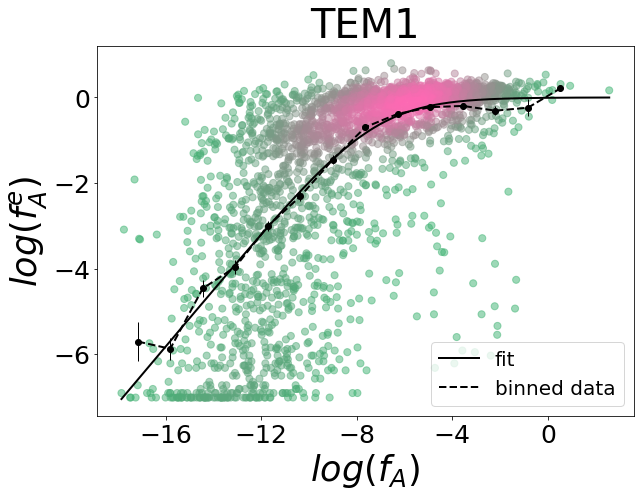

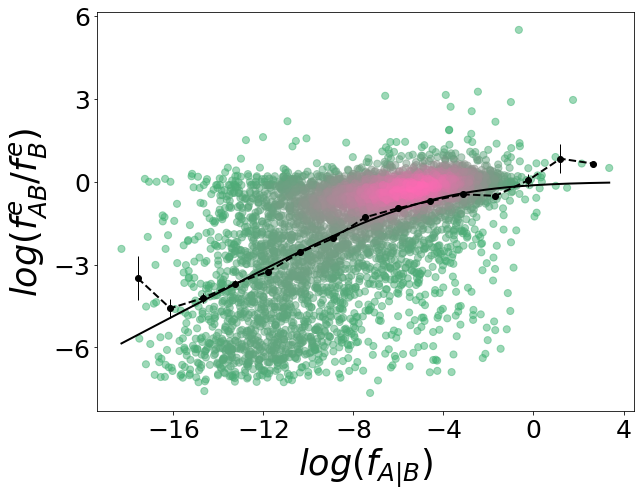

In [60]:
# Extract data
x = sing_df['llm_single_mut']
y = sing_df['expt_single_mut']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.6639
c_param = 7.2371
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'fit')

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)
# Add binned line
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned data')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0)


ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5.5))

# Labels and formatting
ax.set_title('TEM1', fontsize=40)
plt.xlabel("$log(f_A)$", fontsize=35)
plt.ylabel("$log(f^e_A)$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.legend(fontsize=20, loc='lower right')

plt.tight_layout()

plt.savefig('ESM2_Figs/TEM1_wildtype_fit2.png', dpi=300)
plt.show()


doub_df['log_fitness'] = np.log(doub_df['Double Mutant Fitness'])
doub_df['Mut1_expt_fitness'] = np.log(doub_df['Mut 1 Fitness'])
doub_df['Mut2_expt_fitness'] = np.log(doub_df['Mut 2 Fitness'])

log_exp_double_exp_mut2_ = doub_df.log_fitness - doub_df.Mut2_expt_fitness
log_exp_double_exp_mut1_ = doub_df.log_fitness - doub_df.Mut1_expt_fitness

# Concatenate corresponding LLM values
x = pd.concat([doub_df['mut21'], doub_df['mut12']], ignore_index=True)
y = pd.concat([log_exp_double_exp_mut1_, log_exp_double_exp_mut2_], ignore_index=True)

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.4298
c_param = 4.6874
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'$mutated background$')

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)
# Add binned line
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0)



ax.xaxis.set_major_locator(MaxNLocator(nbins=7))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

# Labels and formatting
plt.xlabel(r'$log(f_{A|B})$', fontsize=35)
plt.ylabel(r'$log(f^e_{AB}/f^e_{B})$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#ax.legend(fontsize=15)

plt.tight_layout()

plt.savefig('ESM2_Figs/TEM1_background_fit2.png', dpi=300)
plt.show()


In [61]:
fit_single_path = 'Working_Data/650/20_esm2_650_unique_single_mutations_RRM_Domain.csv'
fit_double_path = 'Working_Data/650/20_llm_RRM_Domain_esm2_650.csv'
sing_df = pd.read_csv(fit_single_path)
doub_df = pd.read_csv(fit_double_path)

In [62]:
sing_df

,Unnamed: 0,mut,llm_mut,exp_mut
0,0,H47N,-0.322617,-0.524843
1,1,K41M,-7.535163,-0.153129
2,2,D26E,-2.459073,-0.011322
3,3,I32F,-9.713330,-0.563762
4,4,Y18A,-3.767156,-0.048517
...,...,...,...,...
819,1305,S40R,-9.043240,-0.183725
820,1308,E50T,-3.638372,-0.090529
821,1309,V23F,-5.227622,-0.127442
822,1310,T20V,-4.863695,-0.140980


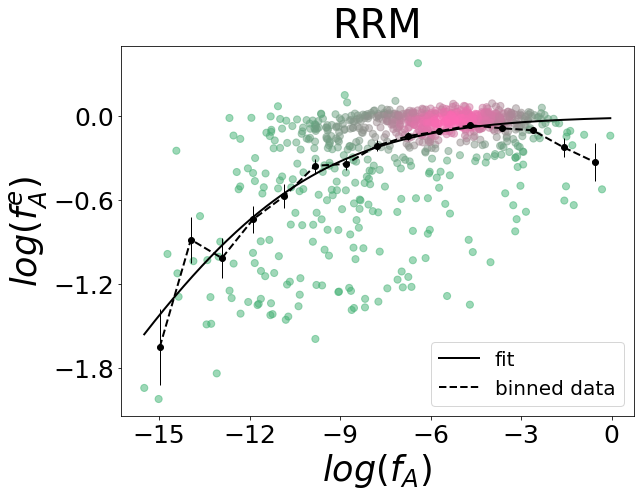

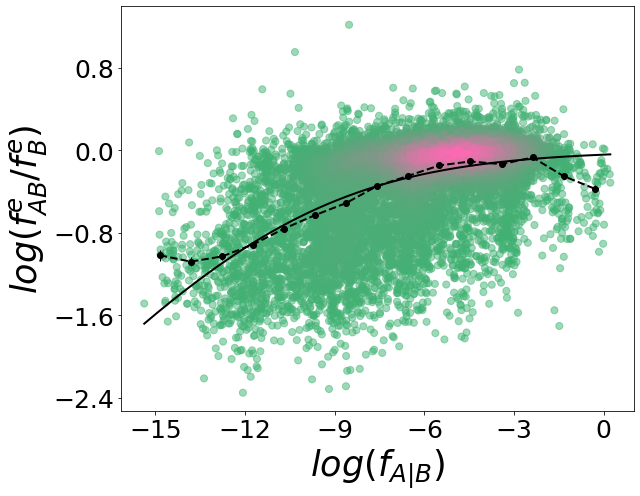

In [63]:
# Extract data
x = sing_df['llm_mut']
y = sing_df['exp_mut']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.3512
c_param = 11.719
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'fit')

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)
# Add binned line
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned data')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0)



ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5.5))


# Labels and formatting
ax.set_title('RRM', fontsize=40)
plt.xlabel("$log(f_A)$", fontsize=35)
plt.ylabel("$log(f^e_A)$", fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.legend(fontsize=20, loc='lower right')
plt.tight_layout()


plt.savefig('ESM2_Figs/RRMd_wildtype_fit2.png', dpi=300)
plt.show()


"""doub_df['log_fitness'] = np.log(doub_df['Double Mutant Fitness'])
doub_df['Mut1_expt_fitness'] = np.log(doub_df['Mut 1 Fitness'])
doub_df['Mut2_expt_fitness'] = np.log(doub_df['Mut 2 Fitness'])"""

log_exp_double_exp_mut2_ = doub_df['exp mut double'] - doub_df['exp mut 2']
log_exp_double_exp_mut1_ = doub_df['exp mut double'] - doub_df['exp mut 1']

# Concatenate corresponding LLM values
x = pd.concat([doub_df['mut21'], doub_df['mut12']], ignore_index=True)
y = pd.concat([log_exp_double_exp_mut1_, log_exp_double_exp_mut2_], ignore_index=True)

xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Define the color map using pinks and greens
from matplotlib.colors import LinearSegmentedColormap
pink_green_cmap = LinearSegmentedColormap.from_list("pink_green", ["mediumseagreen", "hotpink"])

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
scatter = ax.scatter(x.values, y.values, c=z, cmap=pink_green_cmap, s=50, alpha=0.5)

# Add fitted line
a = 1
b = 0.3027
c_param = 10.4994
x_line = np.linspace(min(x), max(x), 500)
y_line = -a * np.log(1 + np.exp(-b * (x_line + c_param)))
ax.plot(x_line, y_line, color='black', linewidth=2, label=r'$mutated background$')

# Bin the data
x1, y1, yerr = regular_bin(x, y, nbins=15)
# Add binned line
ax.plot(x1, y1, color='black', linewidth=2,linestyle='dashed', label=r'binned data')
ax.errorbar(x1, y1, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=0)



ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5.5))


# Labels and formatting
plt.xlabel(r'$log(f_{A|B})$', fontsize=35)
plt.ylabel(r'$log(f^e_{AB}/f^e_{B})$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
#ax.legend(fontsize=15)
plt.tight_layout()


plt.savefig('ESM2_Figs/RRMd_background_fit2.png', dpi=300)
plt.show()


In [1]:
import matplotlib
print(matplotlib.colors.cnames["mediumseagreen"])
print(matplotlib.colors.cnames["hotpink"])
print(matplotlib.colors.cnames["red"])
print(matplotlib.colors.cnames["blue"])

#3CB371
#FF69B4
#FF0000
#0000FF
